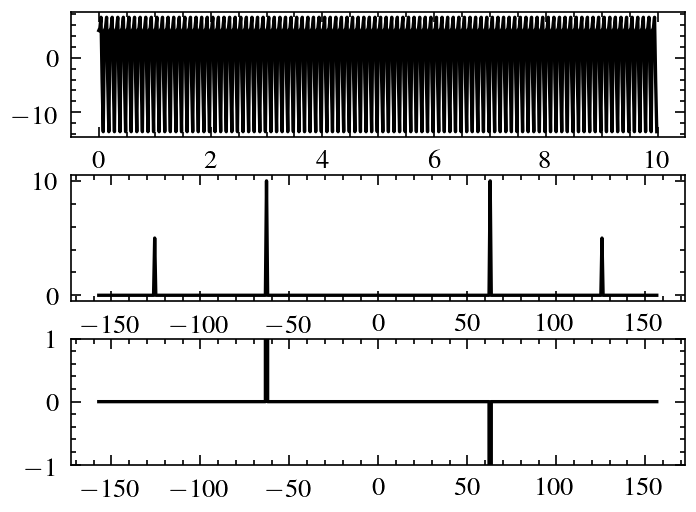

In [103]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use(['science','ieee'])
import scipy.fftpack

n = 500
T = 10
dw = 2 * np.pi / T

t = np.linspace(0, T, n, endpoint=False)
x = 5 * np.cos(2*np.pi*20 * t)  + 10 * np.sin( 2*np.pi*40 * t + np.pi/2)

fftx = scipy.fftpack.fftshift(scipy.fftpack.fft(x))
freq = scipy.fftpack.fftshift(scipy.fftpack.fftfreq(len(x))) * n * dw

amps = np.abs(fftx) * 2 /  n
angs = np.angle(fftx, deg=True) 
angs[amps < 1] = 0

#print(angs, np.unwrap(angs))
fig, ax = plt.subplots(3, 1, dpi=240)
ax[0].plot(t, x)
ax[1].plot(freq, amps)
ax[2].plot(freq, angs)
#ax[2].plot(freq, np.unwrap(angs)/np.pi)
ax[2].set_ylim(-1,1)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

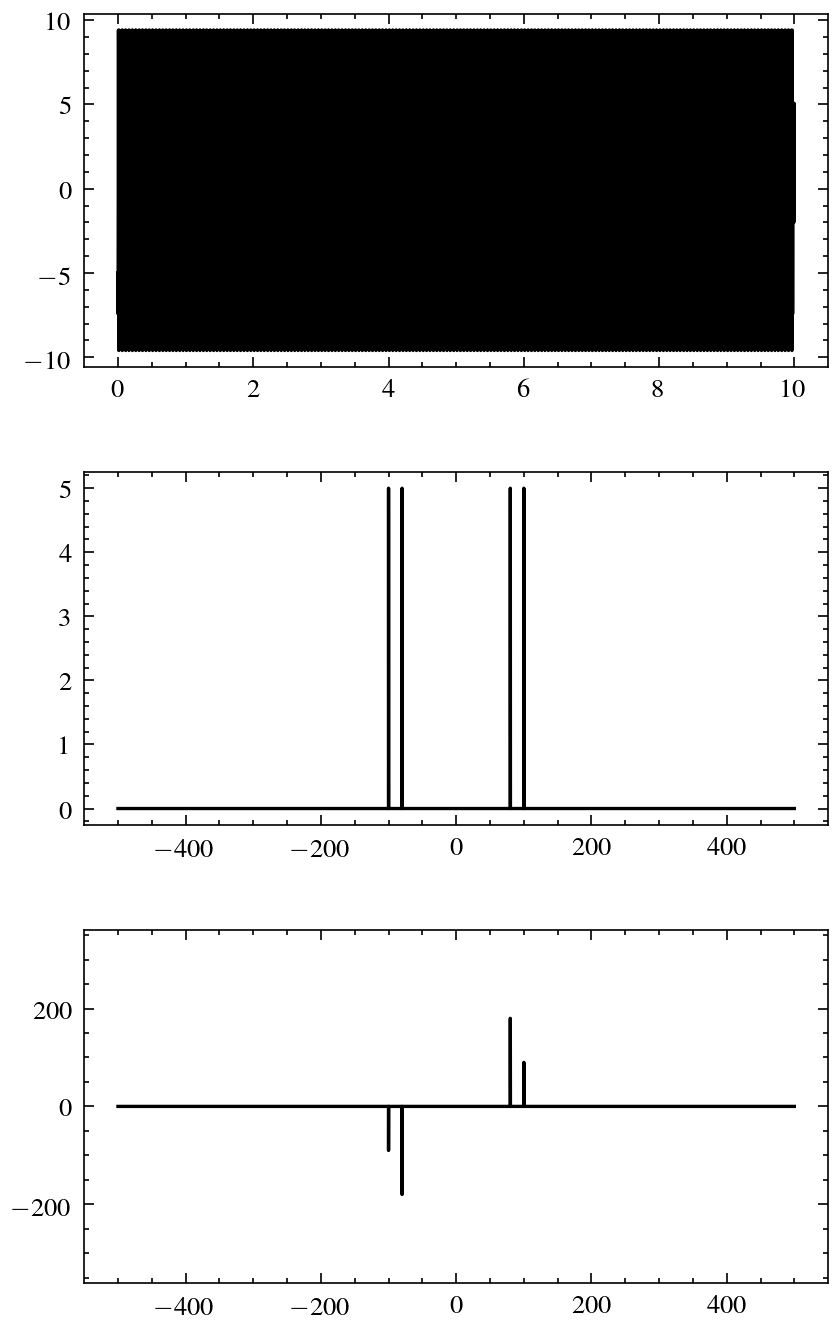

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

phase = np.pi / 2
t = np.linspace(0, 10, num=10000, endpoint=False)
y = 5*np.cos(2 * np.pi *100* t + phase) + 5*np.cos(2 * np.pi *80* t + 2*phase)
Y = scipy.fftpack.fftshift(scipy.fftpack.fft(y))
dt = t[1]-t[0]
f = scipy.fftpack.fftshift(scipy.fftpack.fftfreq(len(t)))/dt

p = np.angle(Y)
p[np.abs(Y) < 1] = 0

fig, ax = plt.subplots(3, 1, dpi=240, figsize=(4,7))
ax[0].plot(t, y)
ax[1].plot(f, np.absolute(Y)*2/len(Y))
ax[2].plot(f, np.rad2deg(p))
ax[2].set_ylim(-360,360)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

    fm (Hz)  Amplitude (nT)  Phase, tm, (deg)        Imag       Real
m                                                                   
0  0.000093           200.0             -80.0 -196.961551  34.729636
1  0.000208            90.0             -70.0  -84.572336  30.781813
2  0.000463            30.0             -60.0  -25.980762  15.000000
3  0.001111            17.0             -50.0  -13.022756  10.927389
4  0.002083             8.0             -40.0   -5.142301   6.128356
5  0.005556             3.5             -30.0   -1.750000   3.031089


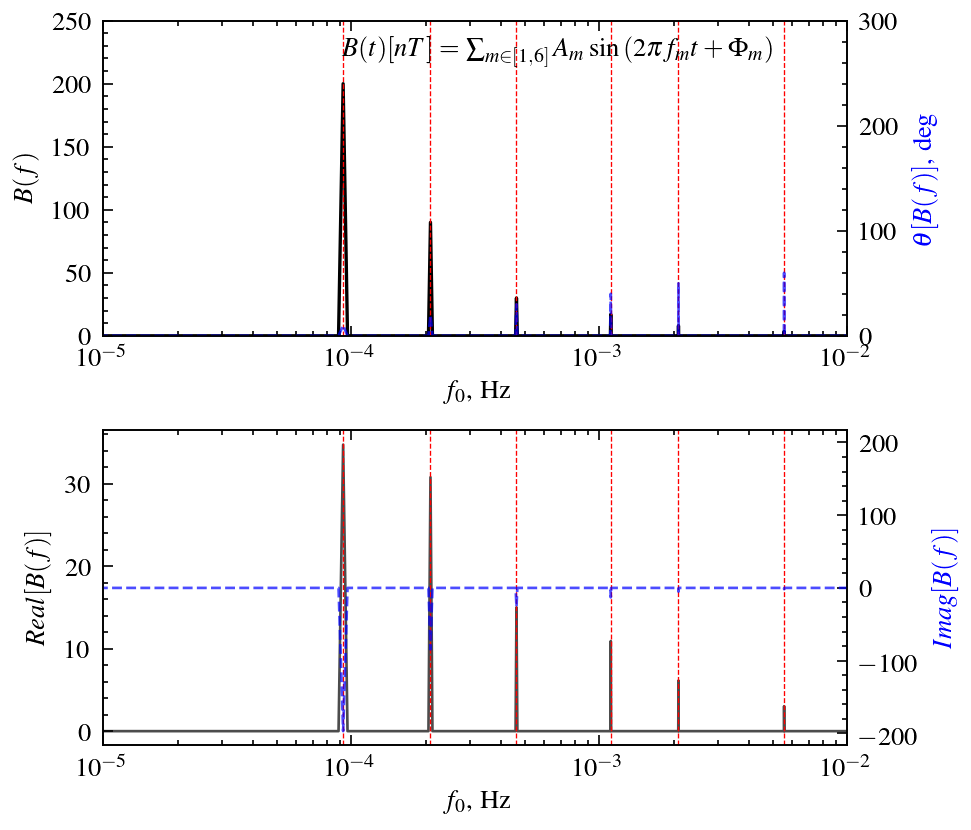

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science','ieee'])
import scipy.fftpack
import pandas as pd

## Tapering by split cosine bell window

def precond(x, tm, p=0.3, plot=False):
    T = len(tm)
    P, P2 = int(T*p), int(T*p/2)
    wp = np.zeros_like(x)
    wp[:P2] = 0.5*(1 - np.cos(2*np.pi*tm[:P2]/P))
    wp[P2:T-P2] = 1.
    wp[T-P2:] = 0.5*(1 - np.cos(2*np.pi*(tm[-1]-tm[T-P2:])/P))
    y = x*wp
    if plot:
        tx = tm/3600.
        fig, ax = plt.subplots(figsize=(5,3), dpi=200)
        ax.plot(tm/3600., wp, "b", lw=1.5)
        ax.set_ylabel(r"$w_p(t)$", color="b")
        ax.set_xlabel(r"$\tau$, Hr")
        ax.set_xlim(tx[0], tx[-1])
        ax.set_ylim(-2,2)
        ax = ax.twinx()
        ax.plot(tm/3600., y, "r", lw=0.9, label=r"$B(\tau)\times w_p(\tau)$")
        ax.plot(tm/3600., x, "k", lw=0.4, label=r"$B(\tau)$")
        ax.set_ylabel(r"$B(\tau)$", color="red")
        ax.legend(loc=1)
        ax.set_ylim(-500,500)
        ax.set_xlim(tx[0], tx[-1])
    return y

Am = np.array([200, 90, 30, 17, 8, 3.5])
Phim = np.array([10, 20, 30, 40, 50, 60])
fm = np.array([10, 20, 30, 40, 50, 60])
Tm = np.array([180, 80, 36, 15, 8, 3])*60
fm = 1./Tm
t = np.linspace(0,60*60*72,3600*10000,endpoint=False)
t = np.linspace(0,60*60*72,3600*10,endpoint=False)

Bt = np.zeros(len(t))
for m in range(6):
    Bt += Am[m]*np.sin(2*np.pi*fm[m]*t + np.deg2rad(Phim[m]))

Bt = precond(Bt, t, 0.)
Y = scipy.fftpack.fftshift(scipy.fftpack.fft(Bt))
dt = t[1]-t[0]
f = scipy.fftpack.fftshift(scipy.fftpack.fftfreq(len(t)))/dt

p = (np.pi/2)+np.angle(Y)
p[np.abs(Y) < 3] = 0

fig, axes = plt.subplots(2, 1, dpi=240, figsize=(4,4))
ax = axes[0]
#ax.plot(f, np.absolute(Y)*2/len(Y), "k", lw=0.8, alpha=0.7)
#ax.set_xlim(0,70)
ax.text(0.9,0.9, r"$B(t)[nT]=\sum_{m\in[1,6]}A_m\sin{(2\pi f_mt+\Phi_m)}$", 
           ha="right", va="center", transform=ax.transAxes)
#ax.text(0.9,0.8, r"$f_m\in\lbrace %s \rbrace$"%(",".join([str(x) for x in fm])), 
#           ha="right", va="center", transform=ax.transAxes)
ax.set_ylim(0,250)
ax.semilogx(f, np.absolute(Y)*2/len(Y))
ax.set_xlim(1e-5,1e-2)
ax.set_ylabel(r"$B(f)$")
ax.set_xlabel(r"$f_0$, Hz")
for i, fq in enumerate(fm):
    ax.axvline(fq, ls="--", color="r", lw=0.4)
ax = ax.twinx()
#ax.plot(f, np.rad2deg(p), "b--", lw=0.8, alpha=0.7)
#ax.set_xlim(0,70)
ax.semilogx(f, np.rad2deg(p), "b--", lw=0.8, alpha=0.7)
ax.set_xlim(1e-5,1e-2)
ax.set_ylim(0,300)
ax.set_ylabel(r"$\theta[B(f)]$, deg", color="b")
ax.set_xlabel(r"$f_0$, Hz")

ax = axes[1]
ax.set_ylabel(r"$Real[B(f)]$")
ax.set_xlabel(r"$f_0$, Hz")
#ax.plot(f, np.real(Y)*2/len(Y), "k", lw=0.8, alpha=0.7)
#ax.set_xlim(0,70)
ax.semilogx(f, np.real(Y)*2/len(Y), "k", lw=0.8, alpha=0.7)
ax.set_xlim(1e-5,1e-2)
for i, fq in enumerate(fm):
    ax.axvline(fq, ls="--", color="r", lw=0.4)
ax = ax.twinx()
#ax.plot(f, np.imag(Y)*2/len(Y), "b--", lw=0.8, alpha=0.7)
#ax.set_xlim(0,70)
ax.semilogx(f, np.imag(Y)*2/len(Y), "b--", lw=0.8, alpha=0.7)
ax.set_xlim(1e-5,1e-2)
ax.set_ylabel(r"$Imag[B(f)]$", color="b")

fig.subplots_adjust(wspace=0.3, hspace=0.3)


dat, fs = [], []
for fq in fm:
    i = np.argmin(abs(fq-f))
    fs.append(f[i])
    dat.append(Y[i]*2/len(Y))
o = pd.DataFrame()
o["fm (Hz)"], o["Amplitude (nT)"], o["Phase, tm, (deg)"] = fm, np.absolute(dat), np.angle(dat, deg=True)
o["Imag"], o["Real"] = np.imag(dat), np.real(dat) 
o.index.name = "m"
print(o)

/home/shibaji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/shibaji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


[-80.07688725 -70.04093506  17.04966853 -50.16982599 -14.46572622
 -30.27977155]


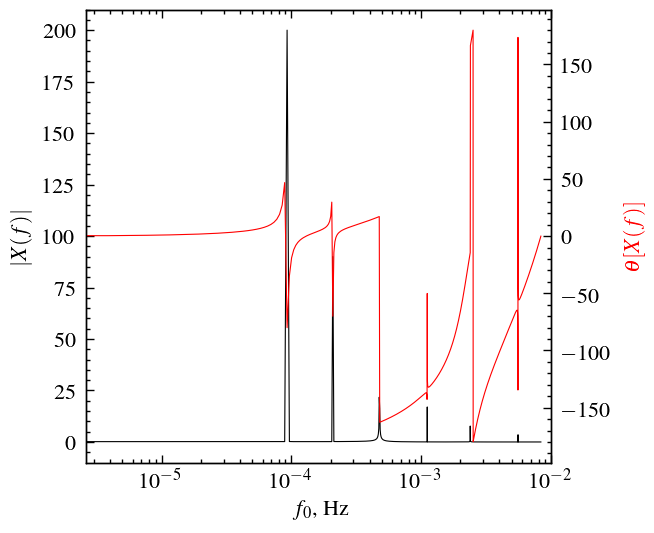

In [1]:
import matplotlib.pyplot as plt
plt.style.use(['science','ieee'])
import numpy as np
import pandas as pd
import scipy.fftpack

import models

## Use fft block to create ifft.

def run_rfft_block(x, dT, plot=True):    
    Y = scipy.fftpack.fftshift(scipy.fftpack.fft(x))
    f = scipy.fftpack.fftshift(scipy.fftpack.fftfreq(len(x)))/dT
    amplt = np.abs(Y)*2/len(Y)
    phase = np.angle(Y, deg=True)
    phase[np.abs(Y) < 1] = 0
    
    if plot:
        fig, ax = plt.subplots(figsize=(3,3), dpi=200)
        ax.semilogx(f, amplt, "k", lw=0.4)
        ax.set_xlim(0, 1e-2)
        ax.set_ylabel(r"$|X(f)|$")
        ax.set_xlabel(r"$f_0$, Hz")
        ax = ax.twinx()
        ax.semilogx(f, phase, "r", lw=0.4)
        ax.set_xlim(0, 1e-2)
        _ = ax.set_ylabel(r"$\theta[X(f)]$", color="r")
    return Y, f

# setup sample B Field data
Am = np.array([200, 90, 30, 17, 8, 3.5])
Phim = np.array([10, 20, 30, 40, 50, 60])
fm = np.array([0.00009259, 0.00020833, 0.00047619, 0.00111111, 0.00238095, 0.00555555])
t = np.linspace(0,60*60*72,60*72,endpoint=False)

Bt = np.zeros(len(t))
for m in range(6):
    Bt += Am[m]*np.sin(2*np.pi*fm[m]*t + np.deg2rad(Phim[m]))

def draw_table(qx, f):
    Kfm = qx.calcZ(layer="floor", freqs=f)
    o = pd.DataFrame()
    o["fm (Hz)"], o["Amplitude |Km| (mV/km/nT)"], o["Phase, tm, (deg)"] = fm, np.absolute(Kfm), np.rad2deg(np.angle(Kfm))
    o.index.name = "m"
    return o.copy()

Bf, frq = run_rfft_block(Bt, t[1]-t[0])
# Check table-1 
dat, fs = [], []
for f in fm:
    i = np.argmin(abs(f-frq))
    fs.append(frq[i])
    dat.append(Bf[i])
print(np.angle(dat, deg=True))

4320 4320 4320


ValueError: x and y must have same first dimension, but have shapes (4320,) and (8638,)

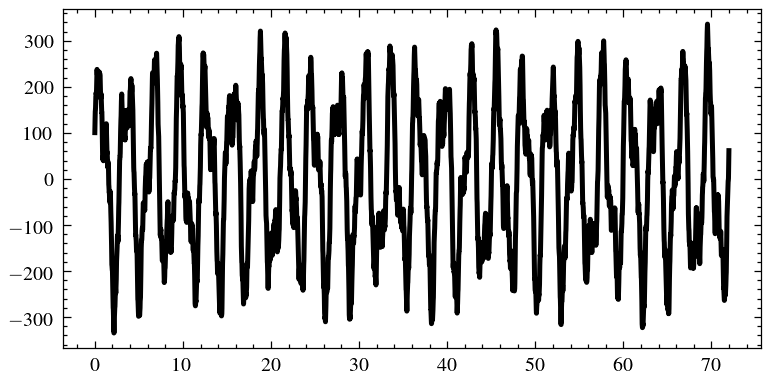

In [4]:
print(len(Bt), len(t), len(Bf))
t0 = t/3600.
fig = plt.figure(dpi=180, figsize=(5, 2.5))
ax = fig.add_subplot(111)
ax.plot(t0, Bt, "k", lw=2)
ax.plot(t0, len(Bt)*np.fft.irfft(Bf)/2, "m", lw=0.6, ls="--")
ax.set_ylabel(r"$B(t)[nT]=\sum_{m\in[1,6]}A_m\sin{(2\pi f_mt+\Phi_m)}$")
ax.set_xlim(0, t0[-1])
ax.set_xlabel("Time, HR")
_ = ax.set_ylim(-400,400)

In [17]:
# Convert uniform Earth model
omu = models.OceanModel()
omu.site.resistivities[:] = 10
ou = draw_table(omu, fm)
print(ou)

# Layered Quebec model
om = models.OceanModel(model_name="DB1")
o = draw_table(om, fm)
print(o)

# Convert uniform Earth model
tfu = omu.get_TFs(freqs=fm)
tfu["Amplitude (mV/km/nT)"], tfu["Phase, tm, (deg)"] = np.absolute(tfu.Ef2Bs), np.rad2deg(np.angle(tfu.Ef2Bs))
tfu = tfu.rename(columns={"freq":"fm (Hz)"}).drop(columns=["Ef2Bs"])
print(tfu)

# Layered Quebec model
tf = om.get_TFs(freqs=fm)
tf["Amplitude (mV/km/nT)"], tf["Phase, tm, (deg)"] = np.absolute(tf.Ef2Bs), np.rad2deg(np.angle(tf.Ef2Bs))
tf = tf.rename(columns={"freq":"fm (Hz)"}).drop(columns=["Ef2Bs"])
print(tf)

    fm (Hz)  Amplitude |Km| (mV/km/nT)  Phase, tm, (deg)
m                                                       
0  0.000093                   0.068040              45.0
1  0.000208                   0.102061              45.0
2  0.000476                   0.154303              45.0
3  0.001111                   0.235702              45.0
4  0.002381                   0.345033              45.0
5  0.005556                   0.527046              45.0
    fm (Hz)  Amplitude |Km| (mV/km/nT)  Phase, tm, (deg)
m                                                       
0  0.000093                   0.218831         77.148399
1  0.000208                   0.448030         73.761223
2  0.000476                   0.868053         67.169259
3  0.001111                   1.539196         62.080708
4  0.002381                   2.593522         60.575720
5  0.005556                   4.662465         54.969926
    fm (Hz)  Amplitude (mV/km/nT)  Phase, tm, (deg)
0  0.000093              0.026889   

In [18]:
from scipy.fft import fft, fftfreq, ifft

def create_fft_frame(signal_a):
    n = int(len(signal_a))
    signal_a_freq = 2.0/n * np.fft.rfft(signal_a)
    fstep = 1 / n
    frq = np.arange(len(signal_a_freq)) * fstep
    frq[0] = frq[1]
    return signal_a_freq, frq

def calculate_electric_field(Bt, ox):
    signal_freq, frq = run_rfft_block(Bt)
    frq[0] = frq[1]
    t = ox.get_TFs(freqs=frq)
    Ef2Bs = np.array(t.Ef2Bs)
    Ef = Ef2Bs*signal_freq
    Et = len(Bt)*np.fft.irfft(Ef)/2
    
    dat, fs = [], []
    for f in fm:
        i = np.argmin(abs(f-frq))
        fs.append(frq[i])
        dat.append(Ef[i])
        
    o = pd.DataFrame()
    o["fm (Hz)"], o["Amplitude (mV/km)"], o["Phase, tm, (deg)"] = fs, np.absolute(dat), np.rad2deg(np.angle(dat))
    o.index.name = "m"
    
    return Et, o

def calculate_analytical_et(tx):
    Et = np.zeros(len(t))
    for m in range(6):
        Et += np.absolute(tx["Amplitude (mV/km/nT)"])[m]*Am[m]*np.sin(2*np.pi*fm[m]*t + np.deg2rad(Phim[m]) + 
                                                                      np.deg2rad(tx["Phase, tm, (deg)"])[m])
        print(Phim[m]+tx["Phase, tm, (deg)"].tolist()[m])
    Ef, frq = run_rfft_block(Et)
    dat, fs = [], []
    for f in fm:
        i = np.argmin(abs(f-frq))
        dat.append(Ef[i])
        fs.append(frq[i])
        
    o = pd.DataFrame()
    o["fm (Hz)"], o["Amplitude (mV/km)"], o["Phase, tm, (deg)"] = fs, np.absolute(dat), np.rad2deg(np.angle(dat))
    o.index.name = "m"
    
    return Et, o

/home/shibaji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/shibaji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/shibaji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/shibaji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


25.125343918459237
29.847229446601002
33.97314228809861
35.922498210603884
34.07980077797609
19.776002037096156
    fm (Hz)  Amplitude (mV/km)  Phase, tm, (deg)
m                                               
0  0.000093           5.378240        -63.943098
1  0.000208           2.717842        -57.925432
2  0.000475           0.678271         26.263761
3  0.001111           0.576498        -42.208284
4  0.002380           0.238905         -4.606485
5  0.005556           0.091438        -10.471623
    fm (Hz)  Amplitude (mV/km)  Phase, tm, (deg)
m                                               
0  0.000093           5.379952        -63.934622
1  0.000208           2.719058        -57.923187
2  0.000475           0.678210         26.204607
3  0.001111           0.576782        -42.225937
4  0.002380           0.238934         -4.642106
5  0.005556           0.091436        -10.506413


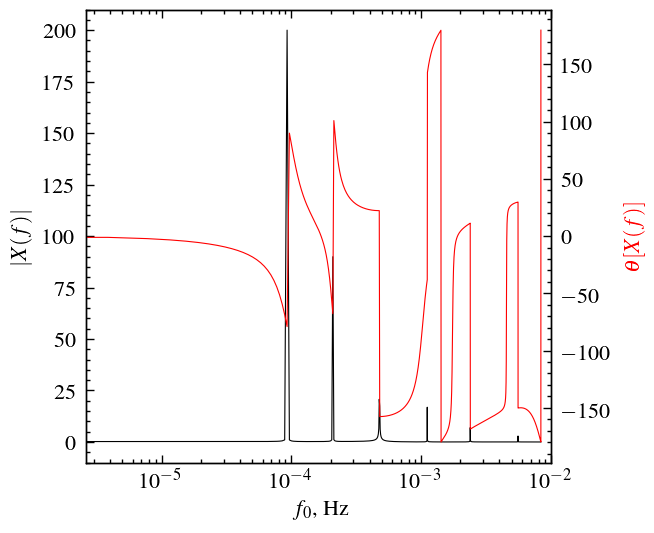

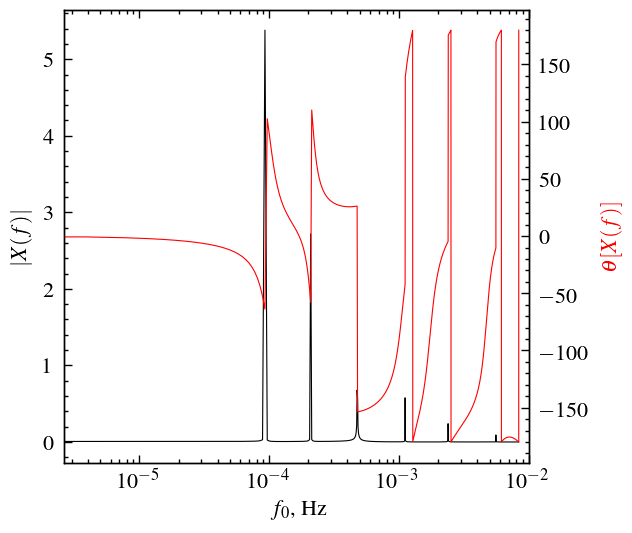

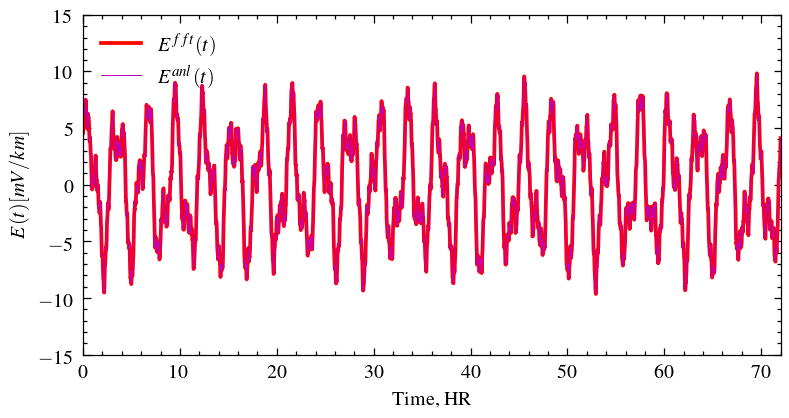

In [19]:
# Convert uniform Earth model
Et_uniform, o_uni = calculate_electric_field(Bt, omu)
Et_analytical_uniform, o_ana_uni = calculate_analytical_et(tfu)
fig = plt.figure(dpi=180, figsize=(5, 2.5))
ax = fig.add_subplot(111)
ax.plot(t0, Et_uniform, "r", lw=1.5, label=r"$E^{fft}(t)$")
ax.set_ylabel(r"$E(t)[mV/km]$")
ax.set_xlim(0, t0[-1])
ax.set_xlabel("Time, HR")
ax.plot(t0, Et_analytical_uniform, "m-", lw=0.4, label=r"$E^{anl}(t)$")
ax.set_ylabel(r"$E(t)[mV/km]$")
ax.legend(loc=2)
ax.set_xlim(0, t0[-1])
_ = ax.set_ylim(-15,15)

print(o_uni)
print(o_ana_uni)